### Importing the libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


### Quick Look at our Data

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber', 'Surname'], axis=1, inplace=True)

In [5]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### EDA

[Text(0.5, 0, 'Status'), Text(0, 0.5, 'Count')]

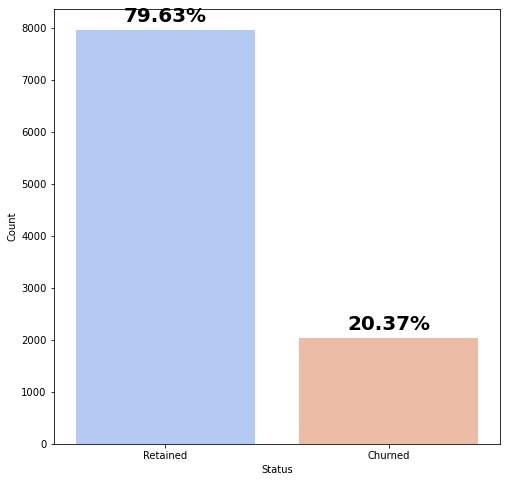

In [9]:
fig, ax = plt.subplots(figsize=(8,8))

sns.countplot(x='Exited', data=df,palette='coolwarm')


for index, value in enumerate( df['Exited'].value_counts()):
    label = '{}%'.format(round((value / df['Exited'].shape[0]) * 100, 2))
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center',
                 
                fontweight='bold',
                size=20)
    
ax.set_xticklabels(['Retained', 'Churned'])
ax.set(xlabel='Status', ylabel='Count')

<AxesSubplot:xlabel='Gender', ylabel='Exited'>

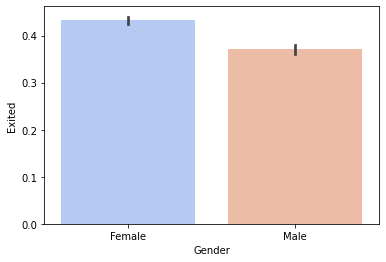

In [10]:
sns.barplot(x='Gender',y='Exited',data=df,estimator=np.std,palette='coolwarm')

<AxesSubplot:xlabel='Geography', ylabel='count'>

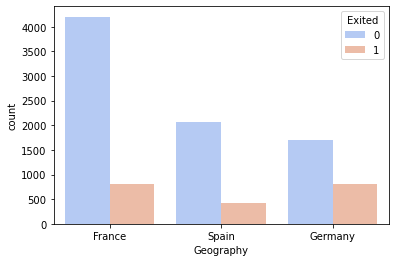

In [11]:
sns.countplot(x='Geography',hue= 'Exited'  ,data= df,palette= 'coolwarm')

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

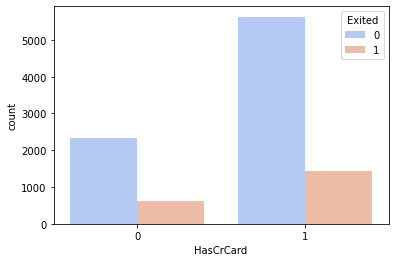

In [12]:
sns.countplot(x='HasCrCard',hue= 'Exited'  ,data= df,palette= 'coolwarm')

<AxesSubplot:>

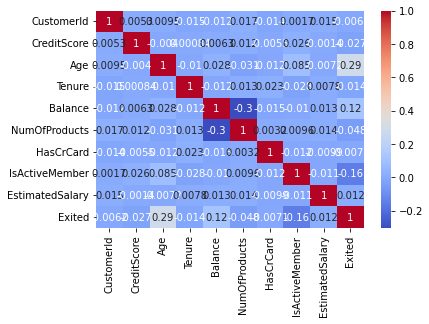

In [13]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='Tenure', ylabel='Exited'>

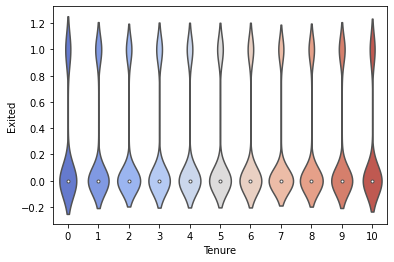

In [14]:
sns.violinplot(x="Tenure", y="Exited", data=df , palette='coolwarm')

### Feature Scaling

In [15]:
scl_columns = ['CreditScore','Balance','Age','EstimatedSalary']
sc = MinMaxScaler()
df[scl_columns] = sc.fit_transform(df[scl_columns])


In [16]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,0.538,France,Female,0.324324,2,0.000000,1,1,1,0.506735,1
1,15647311,0.516,Spain,Female,0.310811,1,0.334031,1,0,1,0.562709,0
2,15619304,0.304,France,Female,0.324324,8,0.636357,3,1,0,0.569654,1
3,15701354,0.698,France,Female,0.283784,1,0.000000,2,0,0,0.469120,0
4,15737888,1.000,Spain,Female,0.337838,2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,0.842,France,Male,0.283784,5,0.000000,2,1,0,0.481341,0
9996,15569892,0.332,France,Male,0.229730,10,0.228657,1,1,1,0.508490,0
9997,15584532,0.718,France,Female,0.243243,7,0.000000,1,0,1,0.210390,1
9998,15682355,0.844,Germany,Male,0.324324,3,0.299226,2,1,0,0.464429,1


###  Encoding categorical data

In [17]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [18]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,3])], remainder='passthrough')
X = ct.fit_transform(X)

### Splitting the dataset into the Training set and Test set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [20]:
X_train

array([[0.0, 1.0, 0.0, ..., 0, 1, 0.6237470678449791],
       [1.0, 0.0, 0.0, ..., 0, 0, 0.20548582389618206],
       [0.0, 1.0, 0.0, ..., 1, 1, 0.22871499228176287],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 1, 0.46012449188897536],
       [1.0, 0.0, 0.0, ..., 1, 1, 0.5058349072336408],
       [0.0, 1.0, 0.0, ..., 1, 0, 0.16727277454996953]], dtype=object)

In [21]:
X_test

array([[1.0, 0.0, 0.0, ..., 1, 1, 0.48527484374757784],
       [1.0, 0.0, 0.0, ..., 1, 0, 0.3326039136737558],
       [1.0, 0.0, 0.0, ..., 0, 1, 0.452672680240963],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 1, 0.8078782023683262],
       [0.0, 1.0, 0.0, ..., 1, 1, 0.8263075623722065],
       [0.0, 1.0, 0.0, ..., 1, 1, 0.2450944565205977]], dtype=object)

### Balancing Data

In [22]:
smote = SMOTE(random_state=141)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

### Train Random Forest

In [23]:
rf = RandomForestClassifier(random_state=101)
rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=101)

In [24]:
predictions=rf.predict(X_test)

In [25]:

accuracies = cross_val_score(estimator = rf, X = X_train_bal, y = y_train_bal, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 90.19 %


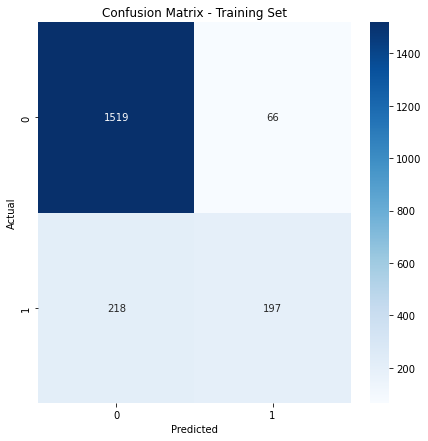

In [26]:

plt.figure(figsize=(7,7))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

### Train KNN

In [27]:
Knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn.fit(X_train_bal, y_train_bal)

KNeighborsClassifier()

In [28]:
prediction=Knn.predict(X_test)

In [29]:

accuracies = cross_val_score(estimator = Knn, X = X_train_bal, y = y_train_bal, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 63.04 %


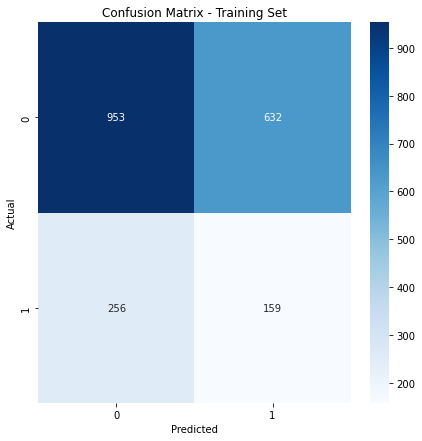

In [30]:

plt.figure(figsize=(7,7))
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

### Train Decision Tree

In [31]:
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
predicted_val=DT.predict(X_test)

In [33]:
accuracies = cross_val_score(estimator = DT, X = X_train_bal, y = y_train_bal, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 85.35 %


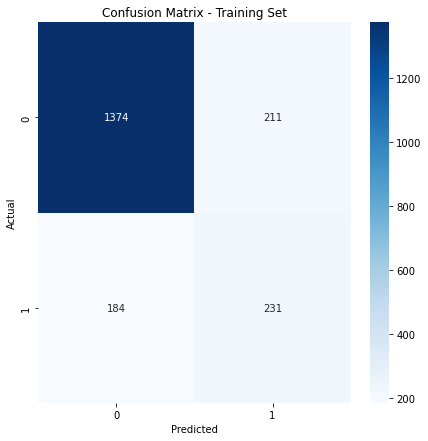

In [34]:

plt.figure(figsize=(7,7))
cm = confusion_matrix(y_test, predicted_val)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

### Train SVC

In [35]:
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)

SVC(random_state=0)

In [36]:
predictionss=svc.predict(X_test)

In [37]:
accuracies = cross_val_score(estimator = svc, X = X_train_bal, y = y_train_bal, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 51.00 %


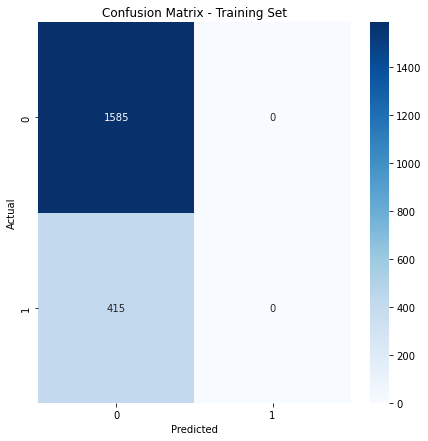

In [38]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(y_test, predictionss)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()